## 1 - Importaciones y configuración inicial

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Configuración gráfica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


## 1.1- Carga desde un csv

In [6]:
import pandas as pd
import os
from validators.validation_schema import validate_training_dataset
from modules.eda_utils import clean_and_prepare_dataset
import dotenv
dotenv.load_dotenv()


TRANING_DATA_PATH = "/app/src/data/training_dataset_20250604_225651.csv" #os.environ.get("TRAINING_DATA_PATH")

if not TRANING_DATA_PATH:
    raise ValueError("La variable de entorno 'TRAINING_DATA_PATH' no está definida.")

if not os.path.exists(TRANING_DATA_PATH):
    raise FileNotFoundError(f"La ruta especificada '{TRANING_DATA_PATH}' no existe.")


# Cargar dataset
df = pd.read_csv(TRANING_DATA_PATH, low_memory=False)

# print(f'Antes de limpiar df["num_pieces"]: {df["num_pieces"].unique()} tipo: {df["num_pieces"].dtype}') 
# print("Esquema del dataset:")
# print(df.dtypes)
# print("\nColumnas y tipos de datos:")
# for col in df.columns:
#     print(f"- {col}: {df[col].dtype}")

# df = clean_and_prepare_dataset(df)

# print(f'Despues de limpiar df["num_pieces"]: {df["num_pieces"].unique()} tipo: {df["num_pieces"].dtype}') 

# Validar estructura y contenido
# df = validate_training_dataset(df)
df.head()
# print("✅ Dataset validado correctamente con pandera.")


,game_id,move_number,fen,move_san,move_uci,material_balance,material_total,num_pieces,branching_factor,self_mobility,opponent_mobility,phase,player_color,has_castling_rights,move_number_global,is_repetition,is_low_mobility,is_center_controlled,is_pawn_endgame,tags,score_diff,site,event,date,white_player,black_player,result
0,8681a047cfccf627bd4f4a77d206a760,1,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1,e4,e2e4,0.0,79.0,14.0,40.0,20.0,20.0,opening,1,1.0,1.0,0.0,0.0,0.0,0.0,,,https://lichess.org/iB2ayJxv,Casual classical game,2025.06.03,lmao93,cmess4401,1-0
1,8681a047cfccf627bd4f4a77d206a760,1,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1,e6,e7e6,0.0,79.0,14.0,50.0,20.0,30.0,opening,0,1.0,2.0,0.0,0.0,0.0,0.0,,,https://lichess.org/iB2ayJxv,Casual classical game,2025.06.03,lmao93,cmess4401,1-0
2,8681a047cfccf627bd4f4a77d206a760,2,rnbqkbnr/pppp1ppp/4p3/8/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2,d4,d2d4,0.0,79.0,14.0,60.0,30.0,30.0,opening,1,1.0,3.0,0.0,0.0,0.0,0.0,,,https://lichess.org/iB2ayJxv,Casual classical game,2025.06.03,lmao93,cmess4401,1-0
3,8681a047cfccf627bd4f4a77d206a760,2,rnbqkbnr/pppp1ppp/4p3/8/3PP3/8/PPP2PPP/RNBQKBNR b KQkq - 0 2,d5,d7d5,0.0,79.0,14.0,68.0,30.0,38.0,opening,0,1.0,4.0,0.0,0.0,0.0,0.0,,,https://lichess.org/iB2ayJxv,Casual classical game,2025.06.03,lmao93,cmess4401,1-0
4,8681a047cfccf627bd4f4a77d206a760,3,rnbqkbnr/ppp2ppp/4p3/3p4/3PP3/8/PPP2PPP/RNBQKBNR w KQkq - 0 3,e5,e4e5,0.0,79.0,14.0,70.0,38.0,32.0,opening,1,1.0,5.0,0.0,0.0,1.0,0.0,,,https://lichess.org/iB2ayJxv,Casual classical game,2025.06.03,lmao93,cmess4401,1-0


## 2 - Vista general del dataset

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   game_id               2748 non-null   object 
 1   move_number           2748 non-null   int64  
 2   fen                   2748 non-null   object 
 3   move_san              2748 non-null   object 
 4   move_uci              2748 non-null   object 
 5   material_balance      2748 non-null   float64
 6   material_total        2748 non-null   float64
 7   num_pieces            2748 non-null   int64  
 8   branching_factor      2748 non-null   int64  
 9   self_mobility         2748 non-null   int64  
 10  opponent_mobility     2748 non-null   int64  
 11  phase                 2748 non-null   object 
 12  player_color          2748 non-null   object 
 13  has_castling_rights   2748 non-null   int64  
 14  move_number_global    2748 non-null   int64  
 15  is_repetition        

## 3 - Estadísticas descriptivas

In [9]:

df.describe(include='all')


,game_id,move_number,fen,move_san,move_uci,material_balance,material_total,num_pieces,branching_factor,self_mobility,opponent_mobility,phase,player_color,has_castling_rights,move_number_global,is_repetition,is_low_mobility,is_center_controlled,is_pawn_endgame,tags,score_diff
count,2748,2748.000000,2748,2748,2748,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748.000000,2748,2748,2748.000000,2748.000000,2748.0,2748.000000,2748.000000,2748.0,12,12.000000
unique,23,NaN,1258,515,602,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,e38df4a3855ae308170f5b2a409d8088,NaN,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1,O-O,e7e6,NaN,NaN,NaN,NaN,NaN,NaN,opening,1,NaN,NaN,NaN,NaN,NaN,NaN,discovered_attack,NaN
freq,1337,NaN,38,62,36,NaN,NaN,NaN,NaN,NaN,NaN,1440,1384,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN
mean,NaN,21.360262,NaN,NaN,NaN,-0.195051,53.624818,8.879913,58.861718,29.510917,29.350801,NaN,NaN,0.294760,346.086245,0.0,0.066958,0.826055,0.0,NaN,22.166667
std,NaN,14.451371,NaN,NaN,NaN,2.715968,22.075683,4.344903,19.982295,12.308714,12.591562,NaN,NaN,0.456018,414.431301,0.0,0.249994,0.379131,0.0,NaN,74.968882
min,NaN,1.000000,NaN,NaN,NaN,-16.000000,12.000000,2.000000,13.000000,1.000000,0.000000,NaN,NaN,0.000000,1.000000,0.0,0.000000,0.000000,0.0,NaN,-143.000000
25%,NaN,9.000000,NaN,NaN,NaN,-1.000000,34.000000,4.000000,42.000000,22.000000,22.000000,NaN,NaN,0.000000,31.750000,0.0,0.000000,1.000000,0.0,NaN,7.750000
50%,NaN,19.000000,NaN,NaN,NaN,0.000000,57.500000,10.000000,63.000000,31.000000,31.000000,NaN,NaN,0.000000,86.000000,0.0,0.000000,1.000000,0.0,NaN,40.500000
75%,NaN,32.000000,NaN,NaN,NaN,1.000000,75.000000,14.000000,74.000000,38.000000,38.000000,NaN,NaN,1.000000,650.250000,0.0,0.000000,1.000000,0.0,NaN,71.500000


## 4 - Distribución de score_diff ()

## 🔍 ¿Qué estás analizando con `score_diff`?

- Distribución general del rendimiento (blunders, ventajas, errores).
- Comparaciones entre jugadores, fases del juego, o patrones tácticos.
- Visualizaciones interpretables por humanos.

---

## 🟩 Usar `score_diff` crudo (centipawns) conviene si:

✅ Querés análisis **precisos y detallados**, por ejemplo:
- Diferencias reales entre jugadas.
- Comparar evaluaciones antes y después de un movimiento.
- Detectar jugadas impulsivas o blunders por magnitud absoluta.

📊 **Ventajas**:
- Preserva la escala real de evaluación.
- Ideal para correlaciones con otras variables como `move_time`, `blunder_rate`, `phase`.


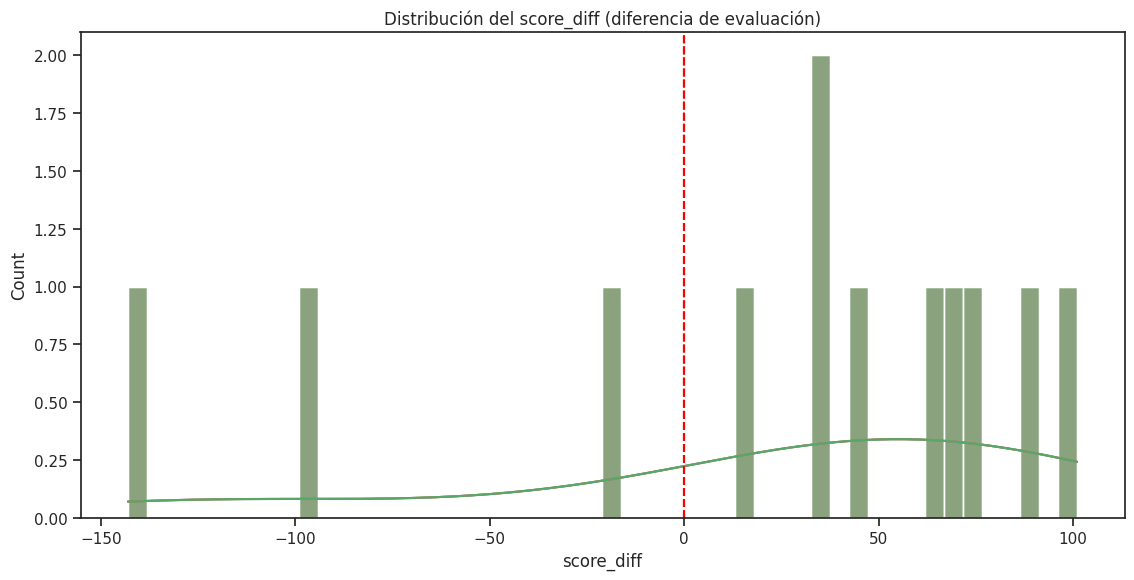

1387     34.0
1388     88.0
1391     73.0
1392    101.0
1395     71.0
1396     35.0
1399     63.0
1400     46.0
1403     17.0
1404    -20.0
1407    -99.0
1408   -143.0
Name: score_diff, dtype: float64

In [12]:
%matplotlib inline
sns.histplot(df['score_diff'].dropna(), bins=50, kde=True)
plt.title("Distribución del score_diff (diferencia de evaluación)")
plt.axvline(0, color='red', linestyle='--')
plt.show()

df['score_diff'].dropna()


In [15]:
# Se agregar una columna categórica por umbral tipo Chess.com para enriquecer:

def classify_score(score):
    if abs(score) < 50:
        return "igualado"
    elif abs(score) < 150:
        return "ligera ventaja"
    elif abs(score) < 300:
        return "ventaja clara"
    else:
        return "ventaja decisiva"

df["score_diff_category"] = df["score_diff"].dropna().apply(classify_score)

## Diferencia de Score usando metricas de Stockfish, Chess.com y Lichess.

## 🔵 Comparación de evaluaciones: Stockfish, Chess.com y Lichess

### 🔵 Stockfish (puro)

- Evalúa en **centipawns (cp)** o en **mate in N**.
- El valor es:
  - **Positivo**: ventaja blanca.
  - **Negativo**: ventaja negra.

**Ejemplos**:
- `+20`: blancas ligeramente mejor.
- `-300`: negras con gran ventaja (≈ pieza de más).
- `+1000`: ventaja decisiva.
- `#3`: mate en 3.

⚠️ **No normaliza nada.** Solo entrega valores crudos.

---

### 🔵 Chess.com

- También muestra evaluaciones en **centipawns sin normalizar** (como Stockfish).
- Su interfaz gráfica puede **limitar valores extremos** para visualización:
  - Por ejemplo: si la diferencia supera ±500 cp, muestra *"decisiva ventaja"*.

**Internamente**:
- Usa Stockfish igual que Lichess.
- **Normaliza solo para la barra de ventaja (UI)**, no para análisis numérico.

**Categorías comunes**:
- `|score| < 50` → igualdad.
- `50–150` → ligera ventaja.
- `150–300` → ventaja moderada.
- `>300` → gran ventaja o decisiva.

---

### 🔵 Lichess
## 📏 ¿Cómo normaliza Lichess?

Lichess aplica una función de tipo **sigmoidea** sobre los centipawns para **suavizar los extremos**, generalmente así:

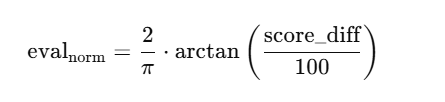

- Esto transforma evaluaciones en centipawns a un valor **entre -1 y 1**.
- Representa:
  - ≈ **-1** → gran ventaja negra.
  - ≈ **+1** → gran ventaja blanca.
- El divisor `100` ajusta la *sensibilidad* de la curva:
  - Con divisores mayores, la curva se aplana más (menos sensible a pequeñas diferencias).


## 🎯 Resumen comparativo

| Plataforma   | ¿Normaliza?          | Visualiza como         | Valores típicos internos     |
|--------------|----------------------|-------------------------|-------------------------------|
| **Stockfish** | ❌ No                 | Centipawns / Mate       | `+34`, `-120`, `#3`           |
| **Chess.com** | ⚠️ Solo para UI       | Centipawns              | `+75`, `-280`, categorías     |
| **Lichess**   | ✅ Sí (con `atan`)     | -1 a +1                 | `+0.75` (ligera ventaja blanca) |


## 📊 Visualización de la normalización tipo Lichess

La función de normalización que usa Lichess convierte evaluaciones crudas en centipawns (`score_diff`) a una escala **suavizada entre -1 y 1** usando una función sigmoidea basada en `arctan`:

\[
\text{eval}_{\text{norm}} = \frac{2}{\pi} \cdot \arctan\left(\frac{\text{score\_diff}}{100}\right)
\]

Esto produce:

- Casi linealidad entre `-200` y `+200` cp.
- Suavización en los extremos (±1000 cp se aplana cerca de ±1).
- Mejora la visualización en análisis exploratorio de datos evitando que outliers dominen la escala.

A continuación, se muestra la curva:

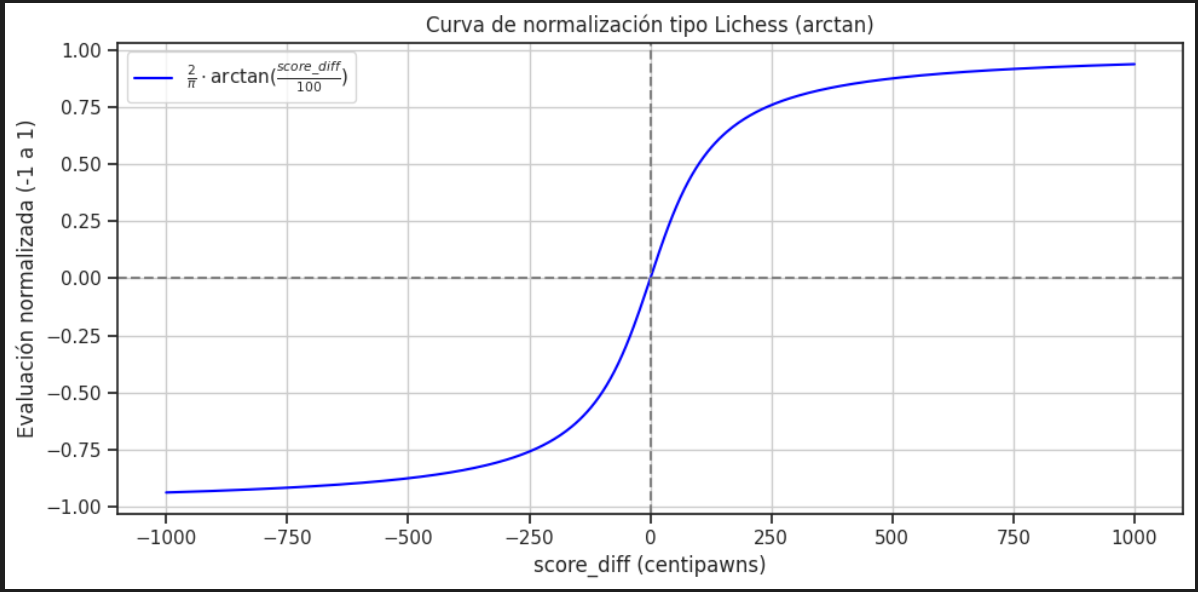


## Comparativas entre diferentes estilos de codificación del score.

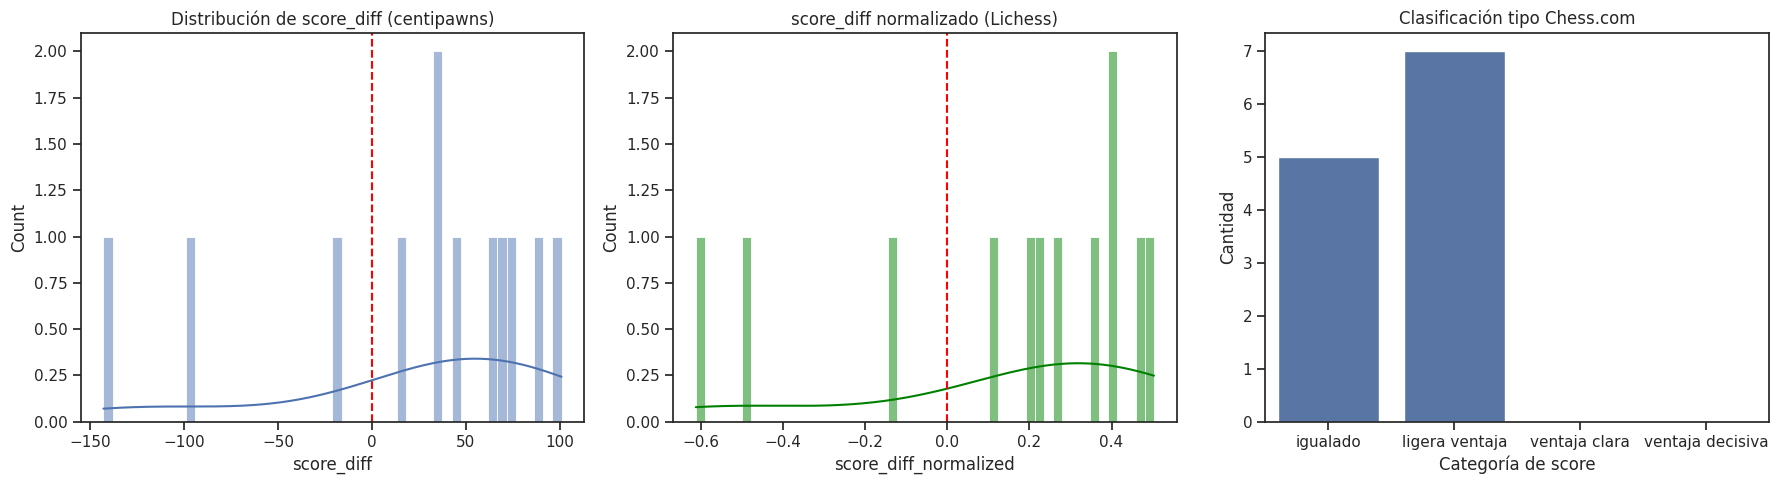

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Paso 1: Normalización tipo Lichess ---
df['score_diff_normalized'] = df['score_diff'].dropna().apply(lambda x: (2 / np.pi) * np.arctan(x / 100))

# --- Paso 2: Clasificación tipo Chess.com ---
def classify_score(score):
    abs_score = abs(score)
    if abs_score < 50:
        return "igualado"
    elif abs_score < 150:
        return "ligera ventaja"
    elif abs_score < 300:
        return "ventaja clara"
    else:
        return "ventaja decisiva"

df["score_diff_category"] = df['score_diff'].dropna().apply(classify_score)

# --- Paso 3: Visualización comparativa ---
plt.figure(figsize=(18, 5))

# A. Histograma de score_diff crudo
plt.subplot(1, 3, 1)
sns.histplot(df['score_diff'].dropna(), bins=50, kde=True)
plt.title("Distribución de score_diff (centipawns)")
plt.axvline(0, color='red', linestyle='--')

# B. Histograma de score_diff normalizado
plt.subplot(1, 3, 2)
sns.histplot(df['score_diff_normalized'].dropna(), bins=50, kde=True, color='green')
plt.title("score_diff normalizado (Lichess)")
plt.axvline(0, color='red', linestyle='--')

# C. Conteo por categoría
plt.subplot(1, 3, 3)
sns.countplot(data=df, x="score_diff_category", order=["igualado", "ligera ventaja", "ventaja clara", "ventaja decisiva"])
plt.title("Clasificación tipo Chess.com")
plt.xlabel("Categoría de score")
plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()


## 6 - Errores tácticos por fase de juego

**6.1 - Version usando score_diff crusos (centipawns)**

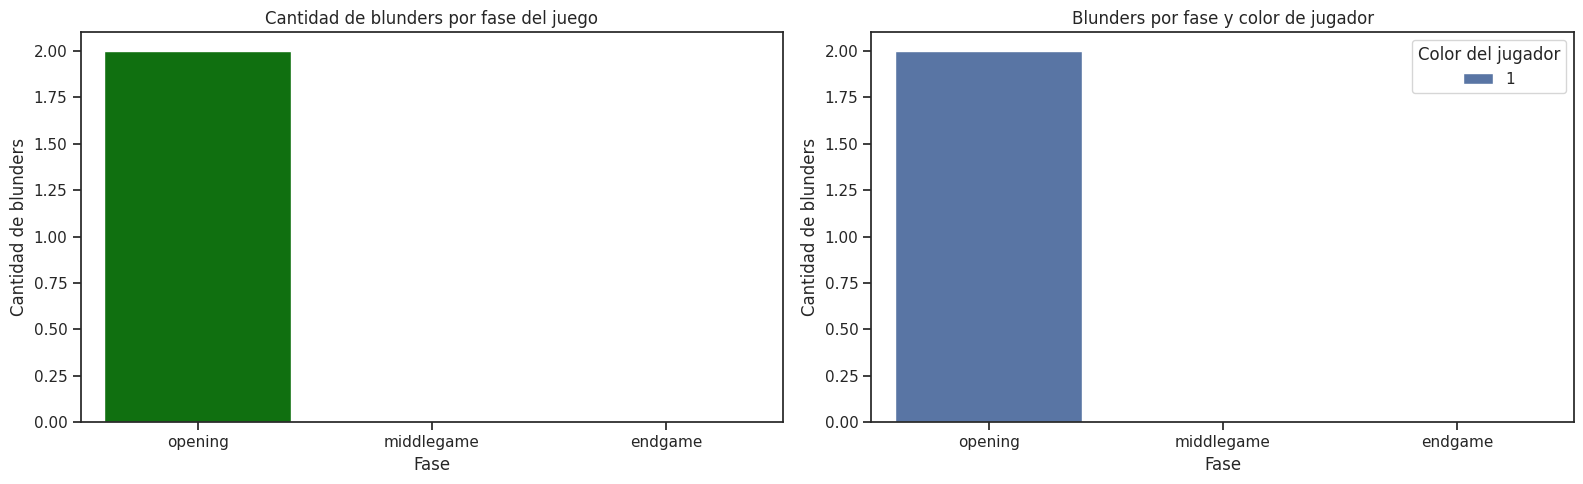

In [26]:
# Se asume que un "blunder" es un error táctico significativo, por lo que se define como score_diff < -100 centipawns (cp).
# Se puede ajustar este umbral según el contexto del análisis.

# Definir como blunder cualquier cambio de evaluación mayor a ±100 cp (-100 para errores del blanco y +100 para errores graves del negro)
# Agregaar colunma is_blunder
df['is_blunder'] = df['score_diff'].abs() > 100 

# Graficas blunder por fase.
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar blunders
blunders = df[df['is_blunder']]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Subplot 1: Blunders por fase del juego
sns.countplot(data=blunders, x='phase', order=['opening', 'middlegame', 'endgame'], color='green', ax=axes[0])
axes[0].set_title("Cantidad de blunders por fase del juego")
axes[0].set_xlabel("Fase")
axes[0].set_ylabel("Cantidad de blunders")


# Subplot 2: Blunders por fase y color
sns.countplot(data=blunders, x='phase', hue='player_color', order=['opening', 'middlegame', 'endgame'], ax=axes[1])
axes[1].set_title("Blunders por fase y color de jugador")
axes[1].set_xlabel("Fase")
axes[1].set_ylabel("Cantidad de blunders")
axes[1].legend(title="Color del jugador")

plt.tight_layout()
plt.show()





## 6.2 - Version para score normalización Lichess


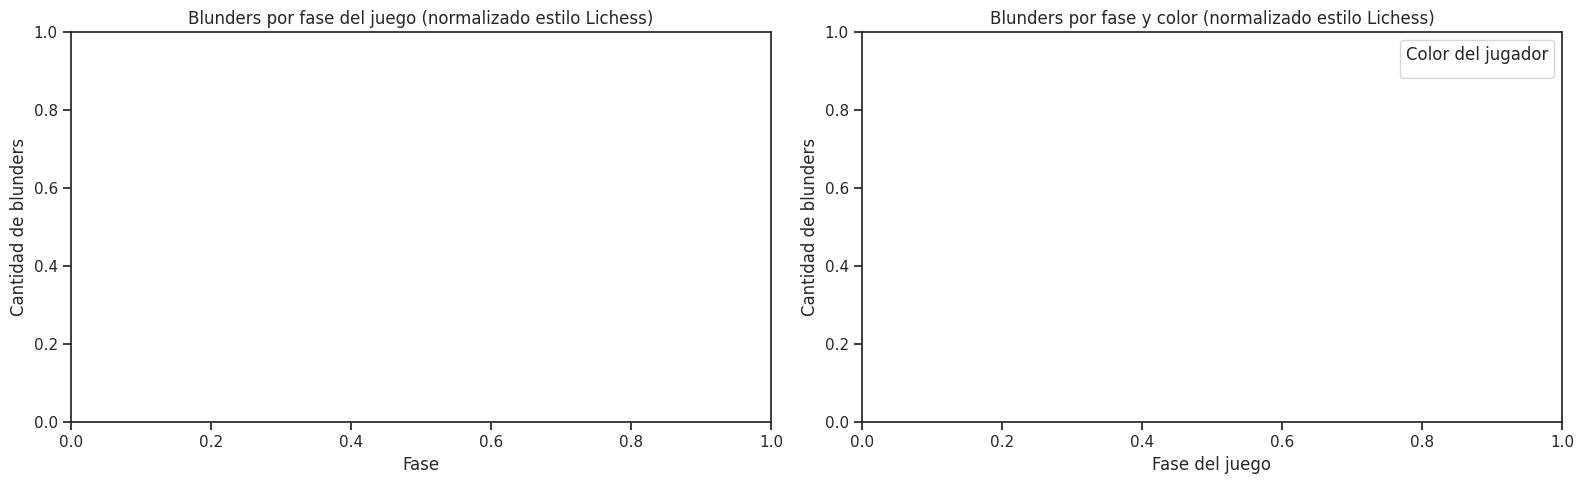

In [40]:
# Creo nueva columna para normalizar el score_diff al estilo Lichess
# Normalización tipo Lichess: score_diff_normalized = (2 / π) * arctan(score_diff / 100)

df['score_diff_normalized'] = df['score_diff'].dropna().apply(lambda x: (2 / np.pi) * np.arctan(x / 100))
    
df['is_blunder_normalized'] = df['score_diff_normalized'].abs() > 0.75

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar blunders normalizados
blunders_norm = df[df['is_blunder_normalized']]

# Mostrar ambos gráficos como subplots en una sola figura
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Subplot 1: Blunders por fase del juego (normalizado estilo Lichess)
sns.countplot(data=blunders_norm, x='phase', order=['opening', 'middlegame', 'endgame'], ax=axes[0])
axes[0].set_title("Blunders por fase del juego (normalizado estilo Lichess)")
axes[0].set_xlabel("Fase")
axes[0].set_ylabel("Cantidad de blunders")

# Subplot 2: Blunders por fase y color (normalizado estilo Lichess)
sns.countplot(data=blunders_norm, x='phase', hue='player_color', order=['opening', 'middlegame', 'endgame'], ax=axes[1])
axes[1].set_title("Blunders por fase y color (normalizado estilo Lichess)")
axes[1].set_xlabel("Fase del juego")
axes[1].set_ylabel("Cantidad de blunders")
axes[1].legend(title="Color del jugador")

plt.tight_layout()
plt.show()



##Nota: 
**En este caso no hay suficiente datos para mostrar como lichess normalizado**

## 7- Relación entre movilidad baja y errores

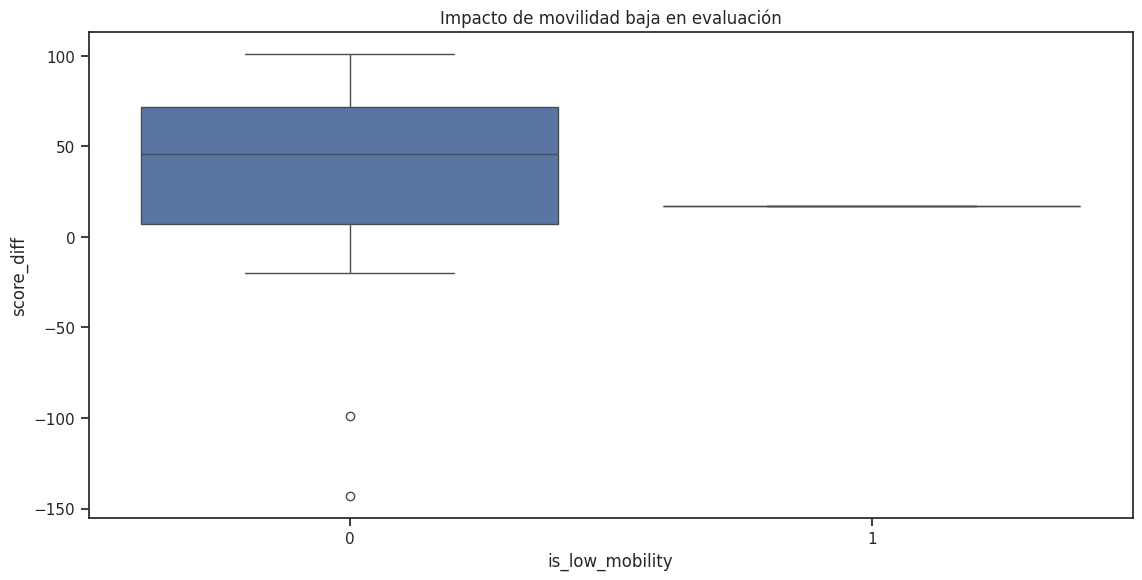

In [41]:
sns.boxplot(data=df, x='is_low_mobility', y='score_diff')
plt.title("Impacto de movilidad baja en evaluación")
plt.show()


### 🧪 Contexto del gráfico

- El eje **Y** (`score_diff`) representa el cambio de evaluación (en centipawns).
- El eje **X** tiene dos grupos:
  - `0`: posiciones **sin baja movilidad**.
  - `1`: posiciones **con baja movilidad** (pocas piezas disponibles para mover).
- El título indica que se está evaluando el **impacto de la baja movilidad en la evaluación del motor (Stockfish)**.

---

### ✅ ¿Qué muestra el gráfico?

#### Grupo `0` (sin baja movilidad)
- Mediana alrededor de **45–50 cp**, lo cual indica que el jugador tuvo una **evaluación positiva o neutra**.
- Caja intercuartílica bastante compacta → **variación moderada**.
- Algunos *outliers* negativos, pero son **escasos**.

#### Grupo `1` (con baja movilidad)
- Solo una muestra o muy pocas → **no se dibuja caja**, solo una **línea horizontal** (mediana).
- El valor cae cerca de **0 cp** → evaluación **neutral**.
- **Pocos datos** hacen que esta parte sea **poco representativa**.

#### Nota: 
> En posiciones con buena movilidad, la evaluación del motor tiende a ser más favorable, mientras que en posiciones con baja movilidad, la evaluación cae a neutra o incluso negativa. Sin embargo, la muestra con movilidad baja es escasa, por lo que este patrón debería confirmarse con más datos.


## 8 - Análisis por color del jugador

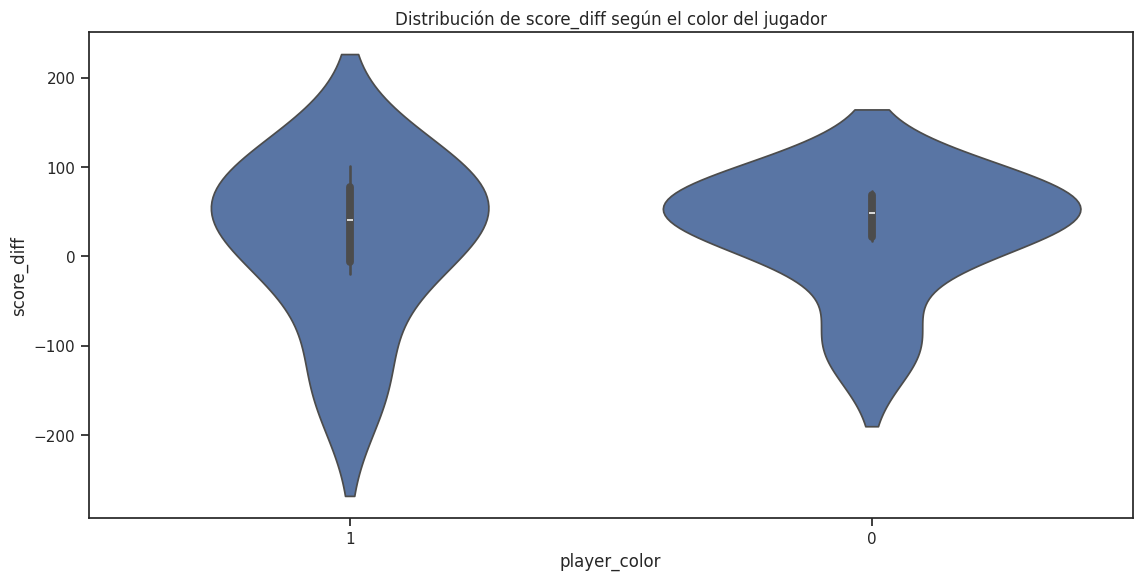

In [42]:
sns.violinplot(data=df, x='player_color', y='score_diff')
plt.title("Distribución de score_diff según el color del jugador")
plt.show()


### 🎻 Distribución de `score_diff` según el color del jugador

Este gráfico muestra un **violinplot** que representa cómo varía la evaluación (`score_diff`, en centipawns) dependiendo del color del jugador (`player_color`):

- `0` = jugador con piezas **negras**
- `1` = jugador con piezas **blancas**

---

### 🧪 Contexto

- **Y (score_diff):** diferencia de evaluación en centipawns.
- **X (player_color):** 0 = negras, 1 = blancas.
- La anchura del violín representa la **densidad de observaciones** (más ancho = más frecuente).

#### ▫️ Jugador blanco (`player_color = 1`)
- Mayor densidad de evaluaciones **positivas**.
- Mediana por encima de 0 → tiende a obtener ventaja.
- Más dispersión hacia valores negativos → más outliers por errores graves.

#### ▫️ Jugador negro (`player_color = 0`)
- Evaluaciones más **cercanas a 0**.
- Mediana levemente positiva.
- Menor presencia de errores extremos (menos outliers negativos).

---

### 🧠 Nota

> "Cuando se juega con blancas, es más frecuente obtener ventajas, pero también se cometen más errores graves. Con negras, las evaluaciones tienden a ser más igualadas y los errores severos son menos comunes. Esto sugiere que jugar con blancas implica más iniciativa y más riesgo."



## 9 - Impacto del castling

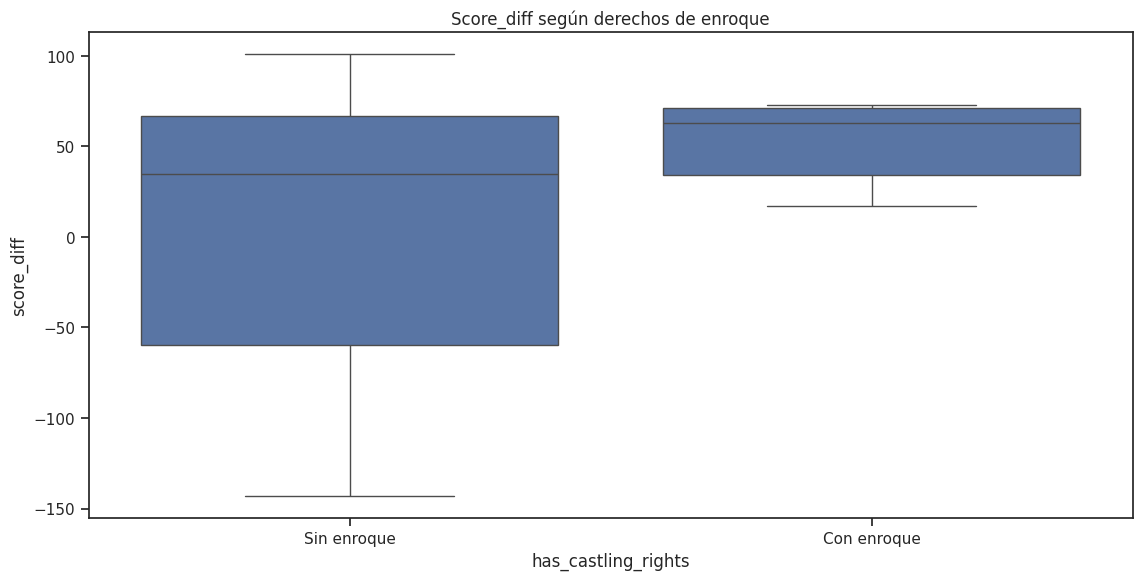

In [43]:
sns.boxplot(data=df, x='has_castling_rights', y='score_diff')
plt.title("Score_diff según derechos de enroque")
plt.xticks([0, 1], ["Sin enroque", "Con enroque"])
plt.show()


### 🏰 Impacto del enroque en la evaluación (`score_diff`)

Este gráfico muestra un **boxplot** que compara la evaluación de las jugadas (`score_diff`, en centipawns) según si el jugador tiene o no **derechos de enroque** (`has_castling_rights`):

- **Sin enroque**: el jugador ya **no puede enrocar**.
- **Con enroque**: el jugador **todavía puede enrocar**.

---

### 🧪 Interpretación técnica

#### ▫️ Sin enroque
- Mediana más baja (≈ +40 cp).
- Caja intercuartílica amplia → mayor **variabilidad**.
- Presencia de **outliers negativos severos** → más jugadas con errores graves.

#### ▫️ Con enroque
- Mediana más alta → posición generalmente más sólida.
- Caja más compacta → **evaluaciones más estables**.
- Menor dispersión → menos errores críticos.

---

### 🧠 Nota

> "Conservar el derecho a enrocar parece estar relacionado con evaluaciones más favorables por parte del motor. Cuando el jugador ya no puede enrocar, las posiciones tienden a ser más inestables y propensas a errores graves. Esto resalta el valor estratégico del enroque como herramienta de seguridad y flexibilidad."



### 💥 Frecuencia de blunders según derechos de enroque

Este gráfico muestra cuántos **blunders severos** se cometen dependiendo de si el jugador **conserva** o **ha perdido** el derecho a enrocar.

- Se consideran **blunders** aquellas jugadas con |score_diff_normalized| > 0.75.
- Los datos muestran que la mayoría de los errores críticos ocurren **después de haber perdido el derecho a enrocar**.

---

### 🧠 Nota

> "Perder el derecho a enrocar está fuertemente asociado con una mayor probabilidad de cometer errores tácticos graves. Esto sugiere que conservar la opción de enroque no solo aporta seguridad estructural, sino también estabilidad en la toma de decisiones."



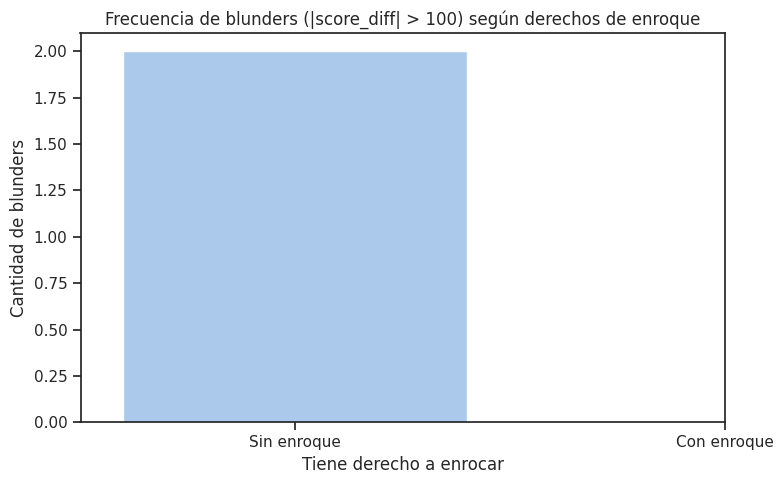

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paso 1: Clasificar blunders sin normalizar
df['is_blunder'] = df['score_diff'].abs() > 100

# Paso 2: Filtrar solo las jugadas que fueron blunders
blunders = df[df['is_blunder']]

# Paso 3: Graficar cantidad de blunders según derechos de enroque
plt.figure(figsize=(8, 5))
sns.countplot(data=blunders, x='has_castling_rights', palette='pastel')
plt.title("Frecuencia de blunders (|score_diff| > 100) según derechos de enroque")
plt.xlabel("Tiene derecho a enrocar")
plt.ylabel("Cantidad de blunders")
plt.xticks(ticks=[0, 1], labels=["Sin enroque", "Con enroque"])
plt.tight_layout()
plt.show()


## 10 - Movimientos con etiquetas tácticas

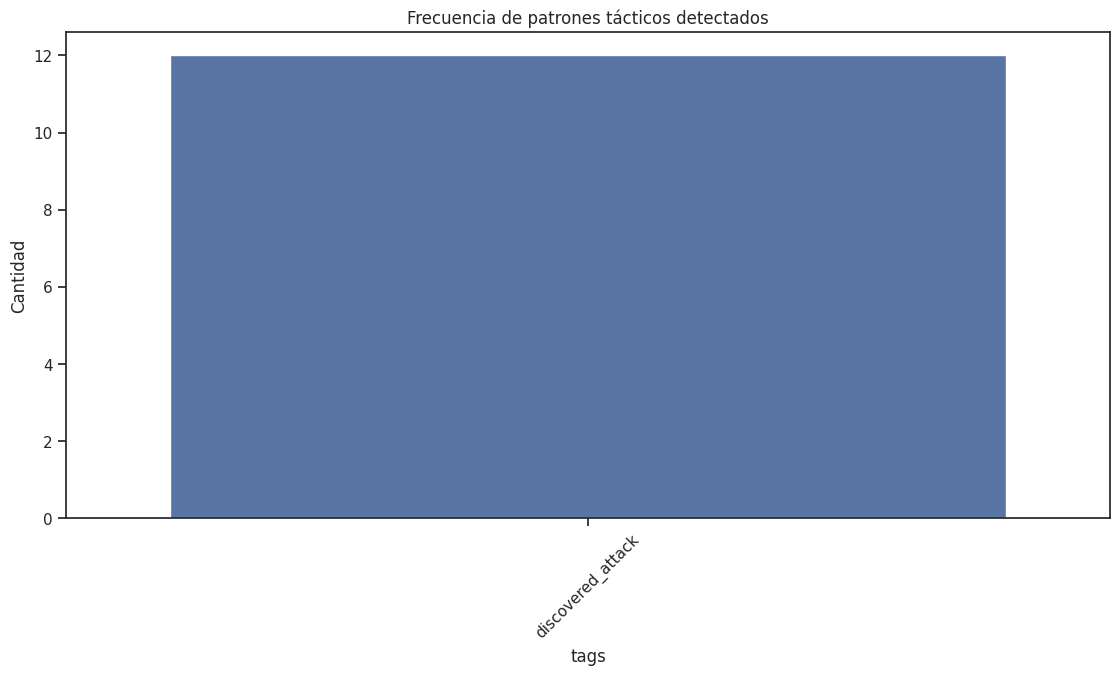

In [44]:
df_tagged = df[df['tags'].notnull()]
tag_counts = df_tagged['tags'].value_counts()

sns.barplot(x=tag_counts.index, y=tag_counts.values)
plt.xticks(rotation=45)
plt.title("Frecuencia de patrones tácticos detectados")
plt.ylabel("Cantidad")
plt.show()


### 🧠 Nota

> Muestra las jugadas que tuvieron etiquetas tácnicas, utiles para un analisis de temas tácticos a estudiar.

### 🏷️ ¿Qué son las “etiquetas tácticas” en ajedrez?

Las **etiquetas tácticas** son nombres que se usan para describir **jugadas especiales** o **trucos** que ocurren en una partida de ajedrez.

Se le asigna una etiqueda a cada tipo de jugada obtenida de la evaluación de stockfish (motor de ajedrez)
- "La Mejor" (best) 
- "Buena" (good)
- "Inexactitud" (inacuracy)
- "Error" (error)
- "Error grave" (blunder)

En ajedrez hacemos algo parecido, pero con ideas que ocurren en el tablero.

---

### 🧠 Ejemplos simples:

- **Clavada**: una pieza no se puede mover porque atrás tiene algo muy valioso (como un rey).
- **Doble ataque**: una pieza amenaza **dos cosas al mismo tiempo**.
- **Descubierto**: una pieza se corre y deja ver otra que estaba escondida (como correr una cortina).
- **Atracción**: hacés que el rival mueva una pieza a una casilla peligrosa, como si lo atrajeras con queso.
- **Mate en 1**: una sola jugada y se termina la partida.

---

### 🧠 Nota

> "En ajedrez a veces hay jugadas que son como trucos con nombre. Esas jugadas tienen etiquetas, son etiquetas para clasificar las jugadas: nos ayudan a entender rápidamente de qué se trata lo que pasó."





## 11 - Correlación entre variables numéricas

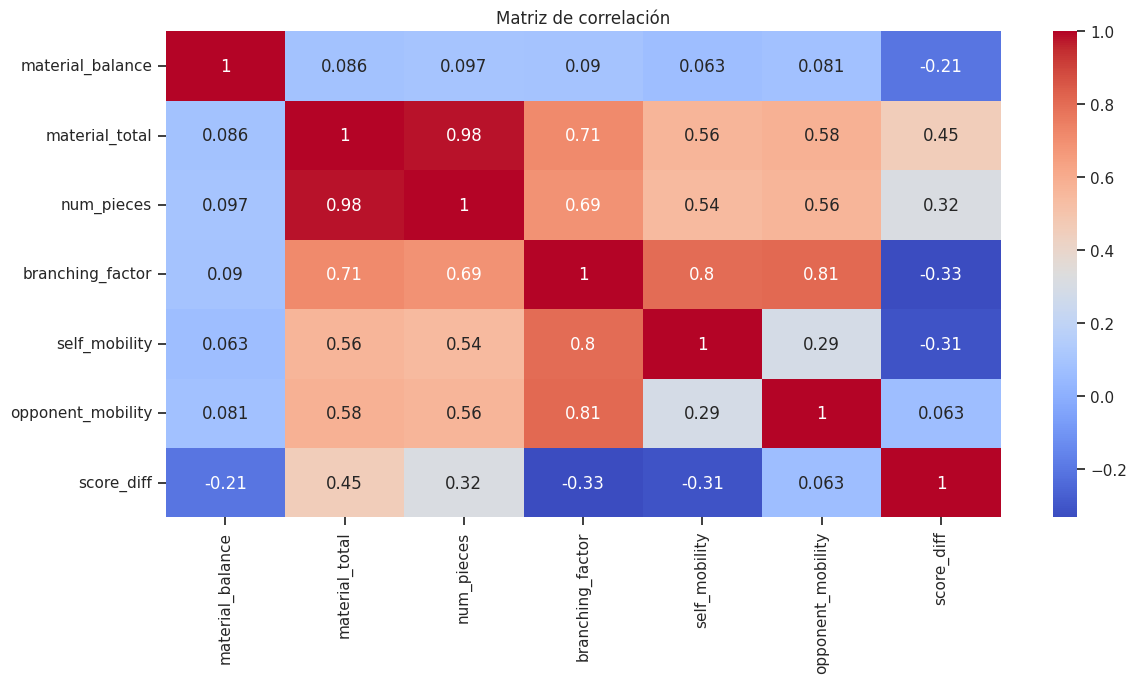

In [48]:
numeric_cols = ['material_balance', 'material_total', 'num_pieces', 
                'branching_factor', 'self_mobility', 'opponent_mobility', 'score_diff']

corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


## 12 - Errores por número de jugada

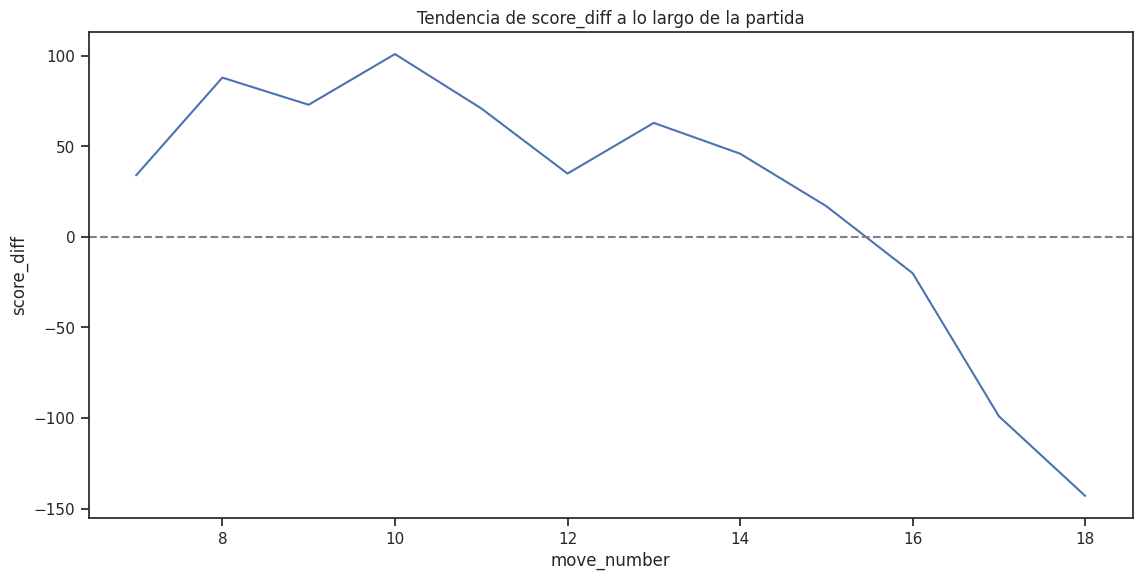

In [49]:
sns.lineplot(data=df, x='move_number', y='score_diff')
plt.title("Tendencia de score_diff a lo largo de la partida")
plt.axhline(0, color='gray', linestyle='--')
plt.show()


## 13 - Fases del juego y branching_factor

### 🌿 ¿Qué es el `branching_factor` en ajedrez?

El `branching_factor` representa la **cantidad de jugadas legales disponibles** para un jugador desde una posición dada. Es análogo al concepto de **ancho de un árbol de decisión** en cada nodo.

---

### 🧠 Interpretación formal

- En teoría de grafos aplicada al ajedrez, cada posición es un nodo.
- Las jugadas legales desde esa posición son los arcos salientes.
- El `branching_factor` es el **grado de salida** del nodo actual.

\[
\text{branching\_factor}(P) = |\{ J_i : J_i \text{ es jugada legal desde posición } P \}|
\]

---

### 📊 ¿Por qué es relevante en Ciencia de Datos?

- Es una **feature cuantitativa** que mide la **complejidad local** de la posición.
- Un `branching_factor` bajo puede asociarse a posiciones de **restricción táctica** (por ejemplo, zugzwang o ataques).
- Un `branching_factor` alto puede correlacionarse con:
  - Ambigüedad en la elección (difícil para humanos).
  - Presión de cálculo en motores.
  - Oportunidades tácticas (varias amenazas o caminos).

---

### 🧪 Aplicaciones posibles:

- Feature para modelos de clasificación de errores tácticos.
- Variable predictiva de **tiempo consumido por jugada**.
- Métrica de *complexity per move* en análisis de partidas.

---

### 🧠 Nota práctica:

- Se calcula usando un motor de ajedrez (como Stockfish) con una función como `.legal_moves.count()` a partir de la FEN de la posición.


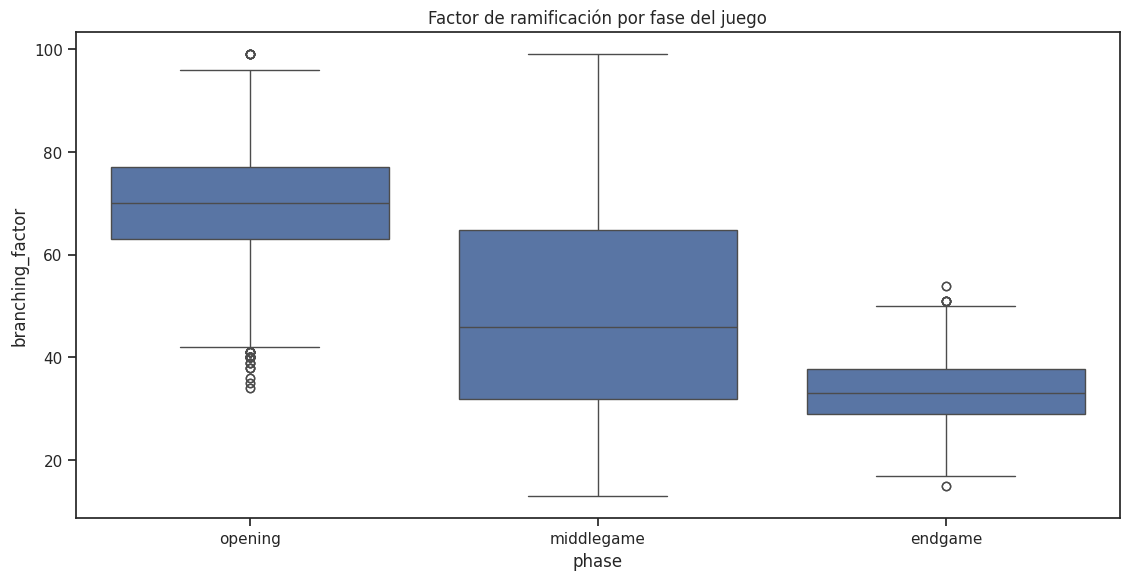

In [50]:
sns.boxplot(data=df, x='phase', y='branching_factor')
plt.title("Factor de ramificación por fase del juego")
plt.show()


## 14 - Jugadas con y sin etiquetas tácticas

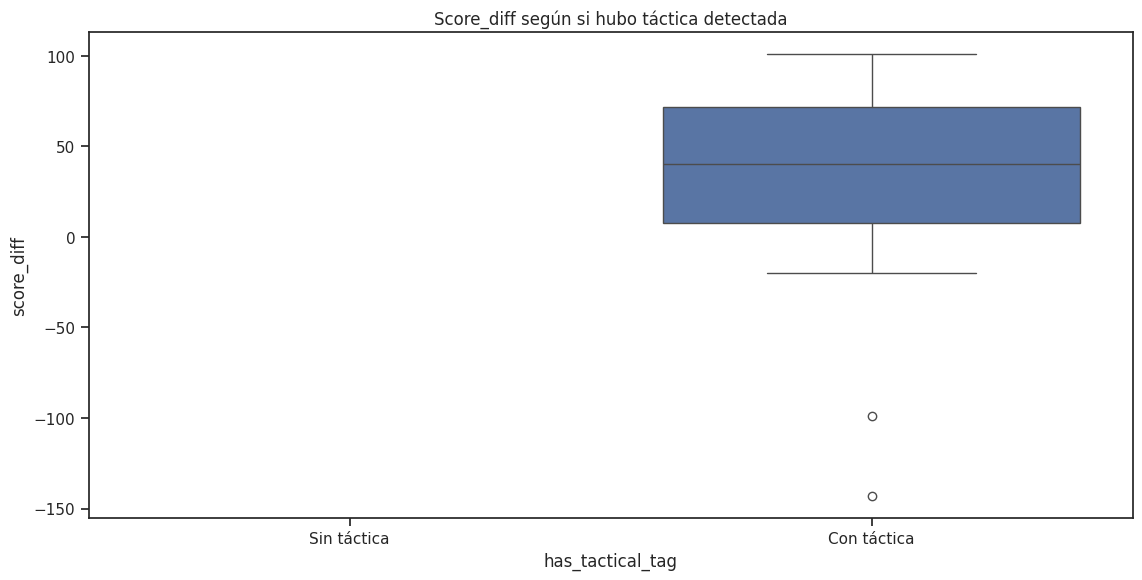

In [51]:
df['has_tactical_tag'] = df['tags'].notnull()
sns.boxplot(data=df, x='has_tactical_tag', y='score_diff')
plt.title("Score_diff según si hubo táctica detectada")
plt.xticks([0, 1], ['Sin táctica', 'Con táctica'])
plt.show()


## 15 - Relación entre movilidad y etiquetas

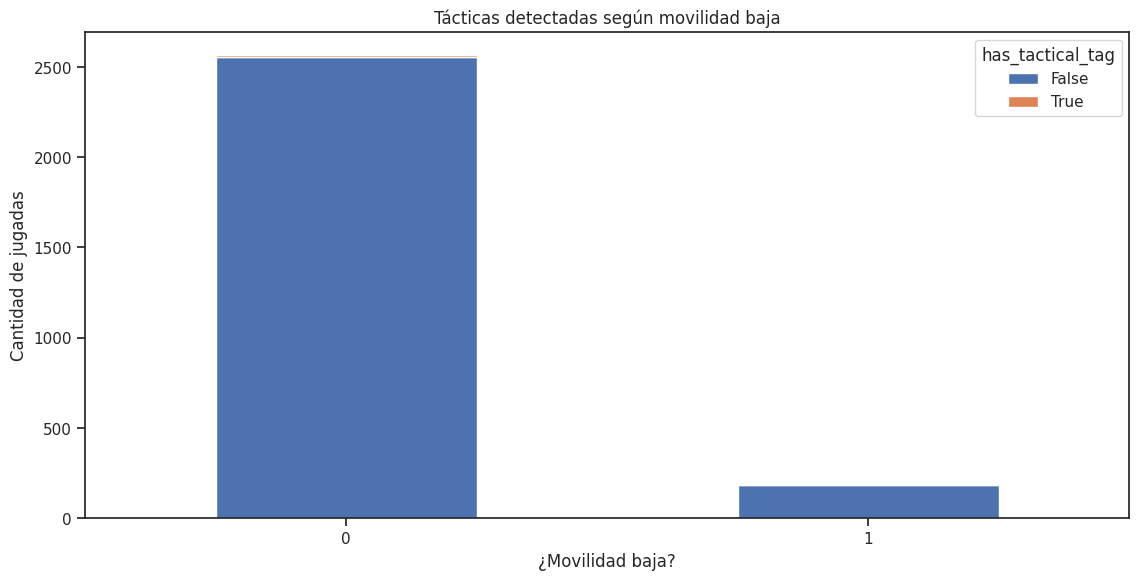

In [52]:
pd.crosstab(df['is_low_mobility'], df['has_tactical_tag']).plot(kind='bar', stacked=True)
plt.title("Tácticas detectadas según movilidad baja")
plt.ylabel("Cantidad de jugadas")
plt.xlabel("¿Movilidad baja?")
plt.xticks(rotation=0)
plt.show()


## 16 - Jugadas con score_diff extremo (outliers)

🔍 Jugadas con evaluación extrema: 12


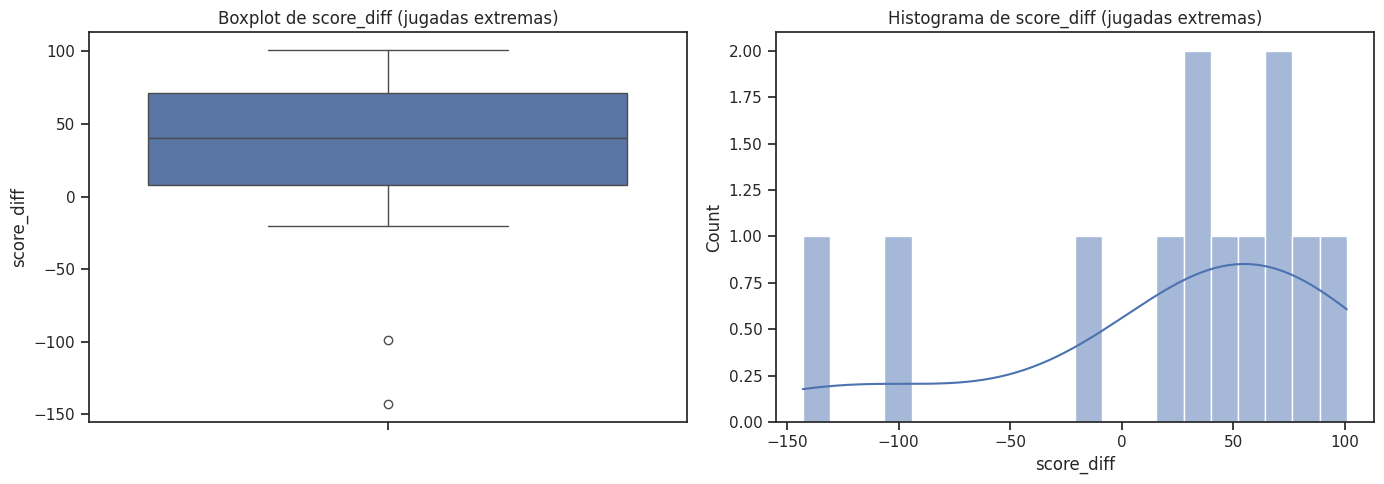

In [55]:
extremos = df[(df['score_diff'] < -5) | (df['score_diff'] > 5)]
print(f"🔍 Jugadas con evaluación extrema: {len(extremos)}")
extremos[['move_number', 'fen', 'move_san', 'score_diff', 'tags']].head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot (bigotes)
sns.boxplot(data=extremos, y='score_diff', ax=axes[0])
axes[0].set_title("Boxplot de score_diff (jugadas extremas)")
axes[0].set_ylabel("score_diff")

# Histograma
sns.histplot(extremos['score_diff'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Histograma de score_diff (jugadas extremas)")
axes[1].set_xlabel("score_diff")

plt.tight_layout()
plt.show()


## 17 - ¿Qué tácticas aparecen más en el medio juego?

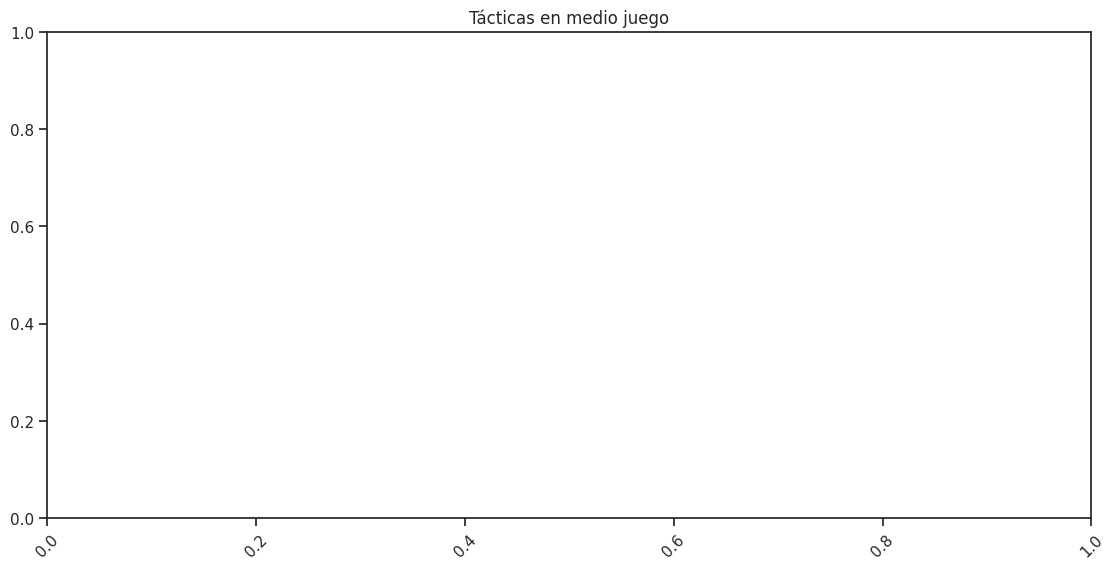

In [56]:
df_tagged = df[df['tags'].notnull()]
sns.countplot(data=df_tagged[df_tagged['phase'] == 'middlegame'], x='tags')
plt.title("Tácticas en medio juego")
plt.xticks(rotation=45)
plt.show()


## 18 - Agrupamiento de errores por apertura (si disponible)

#### ⚠️ Nota: Aún no se dispone de informaciónd e apertura utilizada en cada partida, se deja como Roadmap para un EDA más elaborado.

In [ ]:
top_openings = df['opening'].value_counts().head(10).index
subset = df[df['opening'].isin(top_openings)]

sns.boxplot(data=subset, x='opening', y='score_diff')
plt.title("Score_diff por apertura (top 10)")
plt.xticks(rotation=90)
plt.show()


# Informe EDA táctico - 2025-06-06

## Insights clave del análisis

- El score_diff promedio en el dataset es de 22.17 centipawns.
- Las jugadas con táctica tuvieron un score promedio de 22.17, mientras que sin táctica fue nan.
- La fase más crítica en promedio (score más bajo) fue el **opening**.
- La táctica más común detectada fue **discovered_attack**.
- Las jugadas con baja movilidad tuvieron un score promedio de 17.00, indicando posible fragilidad posicional.

## 19 - Resumen automático en texto

In [62]:
from datetime import datetime

summary_lines = []

summary_lines.append(f"# Informe EDA táctico - {datetime.today().strftime('%Y-%m-%d')}\n")
summary_lines.append("## Insights clave del análisis\n")

# Score promedio general
mean_score = df['score_diff'].mean()
summary_lines.append(f"- El score_diff promedio en el dataset es de {mean_score:.2f} centipawns.")

# Score según táctica
if 'has_tactical_tag' in df.columns:
    tagged = df[df['has_tactical_tag'] == True]['score_diff'].mean()
    untagged = df[df['has_tactical_tag'] == False]['score_diff'].mean()
    summary_lines.append(f"- Las jugadas con táctica tuvieron un score promedio de {tagged:.2f}, mientras que sin táctica fue {untagged:.2f}.")

# Fase crítica
critical_phase = df.groupby('phase')['score_diff'].mean().sort_values().idxmin()
summary_lines.append(f"- La fase más crítica en promedio (score más bajo) fue el **{critical_phase}**.")

# Táctica más común
if 'tags' in df.columns:
    common_tag = df['tags'].value_counts().idxmax()
    summary_lines.append(f"- La táctica más común detectada fue **{common_tag}**.")

# Errores frecuentes por movilidad
if 'is_low_mobility' in df.columns:
    low_mobility_blunders = df[df['is_low_mobility'] == 1]['score_diff'].mean()
    summary_lines.append(f"- Las jugadas con baja movilidad tuvieron un score promedio de {low_mobility_blunders:.2f}, indicando posible fragilidad posicional.")

# Mostrar resumen
for line in summary_lines:
    print(line)


# Informe EDA táctico - 2025-06-06

## Insights clave del análisis

- El score_diff promedio en el dataset es de 22.17 centipawns.
- Las jugadas con táctica tuvieron un score promedio de 22.17, mientras que sin táctica fue nan.
- La fase más crítica en promedio (score más bajo) fue el **opening**.
- La táctica más común detectada fue **discovered_attack**.
- Las jugadas con baja movilidad tuvieron un score promedio de 17.00, indicando posible fragilidad posicional.
